In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
import json

In [39]:
def parse_simout(filepath):
    copy = 0
    scale = 0
    add = 0
    triad = 0
    with open(filepath, "r") as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("Copy:"):
                line = line.split()
                copy = float(line[1])
            elif line.startswith("Scale:"):
                line = line.split()
                scale = float(line[1])
            elif line.startswith("Add:"):
                line = line.split()
                add = float(line[1])
            elif line.startswith("Triad:"):
                line = line.split()
                triad = float(line[1])
    return copy, scale, add, triad

def parse_result_folder_name(name):
    delimiter = ";"
    parts = name.split(delimiter)
    isa = parts[0]
    n_elements = parts[1].split(".")[1]
    n_cores = parts[2]
    return isa, n_elements, n_cores

def do_plot(x, y, cat):
    plt.title(f"gem5 matched board / STREAM ({cat})")
    plt.xlabel("Array Size (MiB)")
    plt.ylabel("Bandwidth (MiB/s)")
    new_x_ticks = list(range(0, 60+1, 5))
    ax = plt.gca()
    ax.set_xticks(new_x_ticks)
    fig = plt.gcf()
    fig.set_size_inches(15, 25/4)
    plt.plot(x, y)

In [40]:
# get data
def main():
    x = []
    y_copy_bw = []
    y_scale_bw = []
    y_add_bw = []
    y_triad_bw = []
    result_path = Path("../results")
    for info_path in result_path.glob("*/info.json"):
        parent_path = info_path.parents[0]
        parent_name = parent_path.name
        simout_path = parent_path / "simout"
        isa, n_elements, n_cores = parse_result_folder_name(parent_name)
        copy_bw, scale_bw, add_bw, triad_bw = parse_simout(simout_path)
        x.append(n_elements)
        y_copy_bw.append(copy_bw)
        y_scale_bw.append(scale_bw)
        y_add_bw.append(add_bw)
        y_triad_bw.append(triad_bw)

    # moving data to numpy
    x_n_elements = np.array(x, dtype=np.double)
    y_copy_bw = np.array(y_copy_bw, dtype=np.double)
    y_scale_bw = np.array(y_scale_bw, dtype=np.double)
    y_add_bw = np.array(y_add_bw, dtype=np.double)
    y_triad_bw = np.array(y_triad_bw, dtype=np.double)
    
    # reorder data
    order = np.argsort(x_n_elements)
    x_n_elements = x_n_elements[order]
    y_copy_bw = y_copy_bw[order]
    y_scale_bw = y_scale_bw[order]
    y_add_bw = y_add_bw[order]
    y_triad_bw = y_triad_bw[order]

    x_MiB = x_n_elements * 8.0 / 1024.0 / 1024.0
    
    do_plot(x_MiB, y_copy_bw, "copy")
    #do_plot(x_MiB, y_scale_bw)
    #do_plot(x_MiB, y_add_bw)
    #do_plot(x_MiB, y_triad_bw)
    

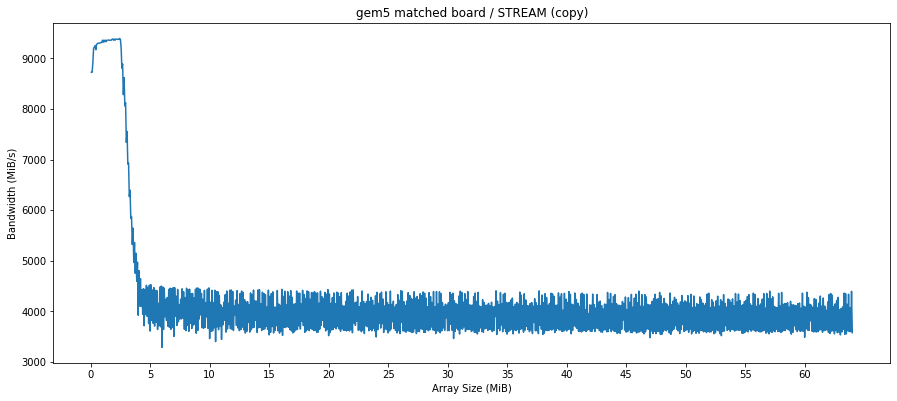

In [41]:
main()